In [1]:

import os
import scipy.io
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from PIL import Image 
import predo
from keras.layers import Input, Add, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,concatenate,Cropping2D
from keras.models import Model
import time
import matplotlib.pyplot as plt
import time

dict_keys(['__header__', '__version__', '__globals__', 'y_onehot', 'x', 'y'])
origin_X shape: (5000,)
origin_Y shape: (5000, 4)
origin_Y_onehot shape: (5000, 4, 19)
origin_X shape: (5000,)
origin_X[0] [[[176 176 176]
  [215 215 215]
  [239 239 239]
  ...
  [ 52  52  52]
  [177 177 177]
  [248 248 248]]

 [[208 208 208]
  [230 230 230]
  [182 182 182]
  ...
  [202 202 202]
  [192 192 192]
  [186 186 186]]

 [[211 211 211]
  [243 243 243]
  [243 243 243]
  ...
  [222 222 222]
  [203 203 203]
  [186 186 186]]

 ...

 [[193 193 193]
  [177 177 177]
  [218 218 218]
  ...
  [195 195 195]
  [235 235 235]
  [216 216 216]]

 [[211 211 211]
  [199 199 199]
  [233 233 233]
  ...
  [212 212 212]
  [213 213 213]
  [212 212 212]]

 [[191 191 191]
  [219 219 219]
  [185 185 185]
  ...
  [204 204 204]
  [175 175 175]
  [240 240 240]]]
origin_X[0] shape: (49, 122, 3)
dict_keys(['__header__', '__version__', '__globals__', 'denoise_x'])
denoise_x shape: (5000, 50, 130)
resize_x shape: (5000, 50, 130)
res

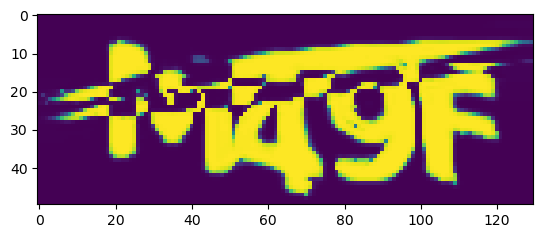

In [2]:

mode = 'dn2'
origin_X,origin_Y,origin_Y_onehot=predo.load_data()

print ("origin_X shape:",origin_X.shape)
print ("origin_X[0]",origin_X[0])
print ("origin_X[0] shape:",origin_X[0].shape)

if mode == 'nopre': resize_x=predo.resize_img(origin_X,True,False)
elif mode == 'dn1': resize_x=predo.load_data_denoise_train2()
elif mode == 'dn2': resize_x=predo.load_data_denoise_train()
    
print ("resize_x shape:",resize_x.shape)
print ("resize_x[0] shape:",resize_x[0].shape)

img = Image.fromarray(resize_x[1234])
plt.imshow(img)
plt.show()


**adjust the batch size and number of epochs in the below code block**

In [3]:

BATCH_SIZE = 128
NUM_EPOCHS = 100 #change to 100

#WEIGHTS_FINAL = 'model-cat-final2.h5'

In [4]:
 
train_rate=0.5 #change to 0.9
num_train_data=int(5000*train_rate)

train_x_orig=resize_x.reshape(5000,50,130,-1)[0:num_train_data]
test_x_orig=resize_x.reshape(5000,50,130,-1)[num_train_data:]
    
x_train=train_x_orig.astype('float32')/255
x_test=test_x_orig.astype('float32')/255

print ("x_train shape: "+str(x_train.shape))
print ("x_test shape: "+str(x_test.shape))

y_train_onehot=origin_Y_onehot[0:num_train_data]
y_test_onehot=origin_Y_onehot[num_train_data:]

print ("y_train_onehot shape: "+str(y_train_onehot.shape))
print ("y_test_onehot shape: "+str(y_test_onehot.shape))

x_train shape: (2500, 50, 130, 1)
x_test shape: (2500, 50, 130, 1)
y_train_onehot shape: (2500, 4, 19)
y_test_onehot shape: (2500, 4, 19)


**adjust your CNN network in the below code block**

In [7]:

def model(input_shape):
    X_input = Input(input_shape)
        
#--------------------------------W1--------------------------------------------
    
    W1 = Conv2D(32, (5, 5), activation = 'relu', padding='same', name = 'conv11_W1')(X_input)
    W1 = Conv2D(32, (3, 3), activation = 'relu', name = 'conv12_W1')(W1)
    W1 = MaxPooling2D((2, 2), name='max_pool1_W1')(W1)
    
    W1 = Conv2D(64, (5, 5), activation = 'relu', padding='same', name = 'conv23_W1')(W1)
    W1 = Conv2D(64, (3, 3), activation = 'relu', name = 'conv24_W1')(W1)
    # W1 = Conv2D(64, (3, 3), strides = (1, 1), activation = 'relu', name = 'conv25_W1')(W1)
    
    # W1 = BatchNormalization(axis = 3, name = 'bn1_W1')(W1)
    W1 = MaxPooling2D((2, 2), name='max_pool2_W1')(W1)
    W1 = Dropout(0.5)(W1)
    
    W1 = Conv2D(128, (3, 3), activation = 'relu', padding='same', name = 'conv36_W1')(W1)
    W1 = Conv2D(128, (3, 3), activation = 'relu', name = 'conv37_W1')(W1)   
    # W1 = Conv2D(128, (3, 3), strides = (1, 1), activation = 'relu', name = 'conv38_W1')(W1)
    W1 = MaxPooling2D((2, 2), name='max_pool3_W1')(W1)
    
    W1 = Conv2D(128, (3, 3), activation = 'relu', padding='same', name = 'conv49_W1')(W1)
    W1 = Conv2D(256, (3, 3), activation = 'relu', name = 'conv410_W1')(W1)
    W1 = BatchNormalization(axis = 3, name = 'bn2_W1')(W1)
    W1 = MaxPooling2D((2, 2), name='max_pool4_W1')(W1)
    
    W1 = Flatten()(W1)
    W1 = Dropout(0.5)(W1)
    
    # D1 = Dense(128, activation='relu', name='fc11_W1')(W1)
    # D1 = Dropout(0.25)(D1)    
    # D1 = Dense(128, activation='relu', name='fc12_W1')(D1)    
    D1 = Dense(19, activation='softmax', name='fc13_W1')(W1)
    
    # D2 = Dense(128, activation='relu', name='fc11_W2')(W1)
    # D2 = Dropout(0.25)(D2)
    # D2 = Dense(128, activation='relu', name='fc12_W2')(D2)    
    D2 = Dense(19, activation='softmax', name='fc13_W2')(W1)
    
    # D3 = Dense(128, activation='relu', name='fc11_W3')(W1)
    # D3 = Dropout(0.25)(D3)
    # D3 = Dense(128, activation='relu', name='fc12_W3')(D3)    
    D3 = Dense(19, activation='softmax', name='fc13_W3')(W1)
    
    # D4 = Dense(128, activation='relu', name='fc11_W4')(W1)
    # D4 = Dropout(0.25)(D4)    
    # D4 = Dense(128, activation='relu', name='fc12_W4')(D4)    
    D4 = Dense(19, activation='softmax', name='fc13_W4')(W1)
            
    model = Model(inputs = X_input, outputs = [D1, D2, D3, D4],name='test')
    return model

In [8]:
# training
if not os.path.isdir('model_history_save'):
    os.mkdir('model_history_save')
    
complete_time=time.strftime("%Y_%m_%d %H_%M_%S", time.localtime()) 
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

# early_stopping : val_loss 連續不降低時，結束訓練
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1,restore_best_weights=True,mode='auto')
# reduce_lr : val_loss 連續不降低時，減少learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, verbose=1, mode='auto',
                            epsilon=0.0001, cooldown=0, min_lr=0)

checkpoint = ModelCheckpoint("model_history_save/best_model_weights.{epoch:02d}_{val_loss:.2f}.h5", monitor='val_loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

if mode == 'nopre': test=model((50,130,3))
else: test=model((50,130,1))

test.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=test.fit(x=x_train,y={"fc13_W1":y_train_onehot[:,0,:],"fc13_W2":y_train_onehot[:,1,:],"fc13_W3":y_train_onehot[:,2,:],"fc13_W4":y_train_onehot[:,3,:]},
                        validation_split=0.2, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,verbose=1, callbacks=[early_stopping,checkpoint,reduce_lr])


Epoch 1/100
16/16 [==============================] - ETA: 0s - loss: 11.8209 - fc13_W1_loss: 2.9533 - fc13_W2_loss: 2.9621 - fc13_W3_loss: 2.9483 - fc13_W4_loss: 2.9573 - fc13_W1_accuracy: 0.0635 - fc13_W2_accuracy: 0.0540 - fc13_W3_accuracy: 0.0615 - fc13_W4_accuracy: 0.0645
Epoch 1: val_loss improved from inf to 11.77516, saving model to model_history_save\best_model_weights.01_11.78.h5
16/16 [==============================] - 36s 2s/step - loss: 11.8209 - fc13_W1_loss: 2.9533 - fc13_W2_loss: 2.9621 - fc13_W3_loss: 2.9483 - fc13_W4_loss: 2.9573 - fc13_W1_accuracy: 0.0635 - fc13_W2_accuracy: 0.0540 - fc13_W3_accuracy: 0.0615 - fc13_W4_accuracy: 0.0645 - val_loss: 11.7752 - val_fc13_W1_loss: 2.9425 - val_fc13_W2_loss: 2.9434 - val_fc13_W3_loss: 2.9451 - val_fc13_W4_loss: 2.9441 - val_fc13_W1_accuracy: 0.0640 - val_fc13_W2_accuracy: 0.0540 - val_fc13_W3_accuracy: 0.0360 - val_fc13_W4_accuracy: 0.0600 - lr: 0.0010
Epoch 2/100
16/16 [==============================] - ETA: 0s - loss: 11.24

Epoch 10/100
16/16 [==============================] - ETA: 0s - loss: 1.3831 - fc13_W1_loss: 0.3386 - fc13_W2_loss: 0.4312 - fc13_W3_loss: 0.3330 - fc13_W4_loss: 0.2803 - fc13_W1_accuracy: 0.8875 - fc13_W2_accuracy: 0.8390 - fc13_W3_accuracy: 0.9000 - fc13_W4_accuracy: 0.9205
Epoch 10: val_loss improved from 6.14339 to 5.34899, saving model to model_history_save\best_model_weights.10_5.35.h5
16/16 [==============================] - 24s 2s/step - loss: 1.3831 - fc13_W1_loss: 0.3386 - fc13_W2_loss: 0.4312 - fc13_W3_loss: 0.3330 - fc13_W4_loss: 0.2803 - fc13_W1_accuracy: 0.8875 - fc13_W2_accuracy: 0.8390 - fc13_W3_accuracy: 0.9000 - fc13_W4_accuracy: 0.9205 - val_loss: 5.3490 - val_fc13_W1_loss: 1.2669 - val_fc13_W2_loss: 1.4372 - val_fc13_W3_loss: 1.3350 - val_fc13_W4_loss: 1.3099 - val_fc13_W1_accuracy: 0.9400 - val_fc13_W2_accuracy: 0.8420 - val_fc13_W3_accuracy: 0.9400 - val_fc13_W4_accuracy: 0.9680 - lr: 0.0010
Epoch 11/100
16/16 [==============================] - ETA: 0s - loss: 0.9

Epoch 19/100
16/16 [==============================] - ETA: 0s - loss: 0.1765 - fc13_W1_loss: 0.0428 - fc13_W2_loss: 0.0529 - fc13_W3_loss: 0.0417 - fc13_W4_loss: 0.0391 - fc13_W1_accuracy: 0.9875 - fc13_W2_accuracy: 0.9875 - fc13_W3_accuracy: 0.9910 - fc13_W4_accuracy: 0.9915
Epoch 19: val_loss did not improve from 1.03798
16/16 [==============================] - 23s 1s/step - loss: 0.1765 - fc13_W1_loss: 0.0428 - fc13_W2_loss: 0.0529 - fc13_W3_loss: 0.0417 - fc13_W4_loss: 0.0391 - fc13_W1_accuracy: 0.9875 - fc13_W2_accuracy: 0.9875 - fc13_W3_accuracy: 0.9910 - fc13_W4_accuracy: 0.9915 - val_loss: 1.2138 - val_fc13_W1_loss: 0.3013 - val_fc13_W2_loss: 0.4159 - val_fc13_W3_loss: 0.3076 - val_fc13_W4_loss: 0.1890 - val_fc13_W1_accuracy: 0.9620 - val_fc13_W2_accuracy: 0.9400 - val_fc13_W3_accuracy: 0.9660 - val_fc13_W4_accuracy: 0.9980 - lr: 0.0010
Epoch 20/100
16/16 [==============================] - ETA: 0s - loss: 0.1779 - fc13_W1_loss: 0.0480 - fc13_W2_loss: 0.0584 - fc13_W3_loss: 0.04

Epoch 28/100
16/16 [==============================] - ETA: 0s - loss: 0.0593 - fc13_W1_loss: 0.0176 - fc13_W2_loss: 0.0137 - fc13_W3_loss: 0.0163 - fc13_W4_loss: 0.0117 - fc13_W1_accuracy: 0.9955 - fc13_W2_accuracy: 0.9980 - fc13_W3_accuracy: 0.9970 - fc13_W4_accuracy: 0.9970
Epoch 28: val_loss did not improve from 0.22942
16/16 [==============================] - 24s 1s/step - loss: 0.0593 - fc13_W1_loss: 0.0176 - fc13_W2_loss: 0.0137 - fc13_W3_loss: 0.0163 - fc13_W4_loss: 0.0117 - fc13_W1_accuracy: 0.9955 - fc13_W2_accuracy: 0.9980 - fc13_W3_accuracy: 0.9970 - fc13_W4_accuracy: 0.9970 - val_loss: 0.2509 - val_fc13_W1_loss: 0.0556 - val_fc13_W2_loss: 0.1389 - val_fc13_W3_loss: 0.0471 - val_fc13_W4_loss: 0.0093 - val_fc13_W1_accuracy: 0.9880 - val_fc13_W2_accuracy: 0.9720 - val_fc13_W3_accuracy: 0.9900 - val_fc13_W4_accuracy: 1.0000 - lr: 0.0010
Epoch 29/100
16/16 [==============================] - ETA: 0s - loss: 0.0514 - fc13_W1_loss: 0.0110 - fc13_W2_loss: 0.0151 - fc13_W3_loss: 0.01

16/16 [==============================] - ETA: 0s - loss: 0.0241 - fc13_W1_loss: 0.0066 - fc13_W2_loss: 0.0075 - fc13_W3_loss: 0.0051 - fc13_W4_loss: 0.0048 - fc13_W1_accuracy: 0.9990 - fc13_W2_accuracy: 0.9990 - fc13_W3_accuracy: 1.0000 - fc13_W4_accuracy: 1.0000
Epoch 37: val_loss did not improve from 0.20146
16/16 [==============================] - 23s 1s/step - loss: 0.0241 - fc13_W1_loss: 0.0066 - fc13_W2_loss: 0.0075 - fc13_W3_loss: 0.0051 - fc13_W4_loss: 0.0048 - fc13_W1_accuracy: 0.9990 - fc13_W2_accuracy: 0.9990 - fc13_W3_accuracy: 1.0000 - fc13_W4_accuracy: 1.0000 - val_loss: 0.2117 - val_fc13_W1_loss: 0.0485 - val_fc13_W2_loss: 0.1295 - val_fc13_W3_loss: 0.0324 - val_fc13_W4_loss: 0.0012 - val_fc13_W1_accuracy: 0.9900 - val_fc13_W2_accuracy: 0.9760 - val_fc13_W3_accuracy: 0.9920 - val_fc13_W4_accuracy: 1.0000 - lr: 0.0010
Epoch 38/100
16/16 [==============================] - ETA: 0s - loss: 0.0295 - fc13_W1_loss: 0.0080 - fc13_W2_loss: 0.0086 - fc13_W3_loss: 0.0063 - fc13_W4_

16/16 [==============================] - ETA: 0s - loss: 0.0160 - fc13_W1_loss: 0.0028 - fc13_W2_loss: 0.0042 - fc13_W3_loss: 0.0058 - fc13_W4_loss: 0.0031 - fc13_W1_accuracy: 1.0000 - fc13_W2_accuracy: 1.0000 - fc13_W3_accuracy: 0.9985 - fc13_W4_accuracy: 1.0000
Epoch 46: val_loss improved from 0.18404 to 0.17753, saving model to model_history_save\best_model_weights.46_0.18.h5
16/16 [==============================] - 22s 1s/step - loss: 0.0160 - fc13_W1_loss: 0.0028 - fc13_W2_loss: 0.0042 - fc13_W3_loss: 0.0058 - fc13_W4_loss: 0.0031 - fc13_W1_accuracy: 1.0000 - fc13_W2_accuracy: 1.0000 - fc13_W3_accuracy: 0.9985 - fc13_W4_accuracy: 1.0000 - val_loss: 0.1775 - val_fc13_W1_loss: 0.0341 - val_fc13_W2_loss: 0.1232 - val_fc13_W3_loss: 0.0189 - val_fc13_W4_loss: 0.0013 - val_fc13_W1_accuracy: 0.9920 - val_fc13_W2_accuracy: 0.9840 - val_fc13_W3_accuracy: 0.9960 - val_fc13_W4_accuracy: 1.0000 - lr: 6.4000e-04
Epoch 47/100
16/16 [==============================] - ETA: 0s - loss: 0.0172 - fc1

16/16 [==============================] - ETA: 0s - loss: 0.0092 - fc13_W1_loss: 0.0018 - fc13_W2_loss: 0.0036 - fc13_W3_loss: 0.0021 - fc13_W4_loss: 0.0016 - fc13_W1_accuracy: 1.0000 - fc13_W2_accuracy: 0.9995 - fc13_W3_accuracy: 1.0000 - fc13_W4_accuracy: 1.0000
Epoch 55: val_loss did not improve from 0.17642
16/16 [==============================] - 24s 1s/step - loss: 0.0092 - fc13_W1_loss: 0.0018 - fc13_W2_loss: 0.0036 - fc13_W3_loss: 0.0021 - fc13_W4_loss: 0.0016 - fc13_W1_accuracy: 1.0000 - fc13_W2_accuracy: 0.9995 - fc13_W3_accuracy: 1.0000 - fc13_W4_accuracy: 1.0000 - val_loss: 0.1898 - val_fc13_W1_loss: 0.0411 - val_fc13_W2_loss: 0.1240 - val_fc13_W3_loss: 0.0241 - val_fc13_W4_loss: 5.8153e-04 - val_fc13_W1_accuracy: 0.9940 - val_fc13_W2_accuracy: 0.9820 - val_fc13_W3_accuracy: 0.9960 - val_fc13_W4_accuracy: 1.0000 - lr: 5.1200e-04
Epoch 56/100
16/16 [==============================] - ETA: 0s - loss: 0.0100 - fc13_W1_loss: 0.0027 - fc13_W2_loss: 0.0024 - fc13_W3_loss: 0.0030 - 


Epoch 64: ReduceLROnPlateau reducing learning rate to 0.00032768002711236477.
16/16 [==============================] - 24s 2s/step - loss: 0.0086 - fc13_W1_loss: 0.0028 - fc13_W2_loss: 0.0020 - fc13_W3_loss: 0.0019 - fc13_W4_loss: 0.0019 - fc13_W1_accuracy: 0.9995 - fc13_W2_accuracy: 0.9995 - fc13_W3_accuracy: 1.0000 - fc13_W4_accuracy: 1.0000 - val_loss: 0.1860 - val_fc13_W1_loss: 0.0449 - val_fc13_W2_loss: 0.1181 - val_fc13_W3_loss: 0.0226 - val_fc13_W4_loss: 3.7681e-04 - val_fc13_W1_accuracy: 0.9880 - val_fc13_W2_accuracy: 0.9840 - val_fc13_W3_accuracy: 0.9920 - val_fc13_W4_accuracy: 1.0000 - lr: 4.0960e-04
Epoch 64: early stopping


In [9]:
#info
print(test.summary()) 
test_weights = np.array(test.get_weights(),dtype=object)

# weight shape
'''
print('weights shape :',test_weights.shape)
for i in range (0,test_weights.shape[0],2):
    print('weights 0 shape :',test_weights[i].shape)
    print('bias 0 shape :',test_weights[i+1].shape)  
'''

Model: "test"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 50, 130, 1)]         0         []                            
                                                                                                  
 conv11_W1 (Conv2D)          (None, 50, 130, 32)          832       ['input_2[0][0]']             
                                                                                                  
 conv12_W1 (Conv2D)          (None, 48, 128, 32)          9248      ['conv11_W1[0][0]']           
                                                                                                  
 max_pool1_W1 (MaxPooling2D  (None, 24, 64, 32)           0         ['conv12_W1[0][0]']           
 )                                                                                             

"\nprint('weights shape :',test_weights.shape)\nfor i in range (0,test_weights.shape[0],2):\n    print('weights 0 shape :',test_weights[i].shape)\n    print('bias 0 shape :',test_weights[i+1].shape)  \n"

**test.save( )** in the below code block have to adjust if you don't want your saved old model be cover by your new model which is going to be saved.

In [10]:
#save weights

complete_time=time.strftime("%Y_%m_%d %H_%M_%S", time.localtime()) 

test.save(mode+'_test_samll'+'.keras')
#test.save_weights(mode+'_weights_'+str(complete_time)+'.h5')

#model.save(WEIGHTS_FINAL) 

In [11]:
#evaluate
scores=test.evaluate(x_test, {"fc13_W1":y_test_onehot[:,0,:],"fc13_W2":y_test_onehot[:,1,:],"fc13_W3":y_test_onehot[:,2,:],"fc13_W4":y_test_onehot[:,3,:]}, verbose=0)  
print('Test W1 loss:', scores[1],' Test W1 accuracy:', scores[5])
print('Test W2 loss:', scores[2],' Test W2 accuracy:', scores[6])
print('Test W3 loss:', scores[3],' Test W3 accuracy:', scores[7])
print('Test W4 loss:', scores[4],' Test W4 accuracy:', scores[8])

#儲存history
np.save(mode+'_weights_'+str(complete_time)+'_history.npy',train_history.history)



Test W1 loss: 0.07231398671865463  Test W1 accuracy: 0.9911999702453613
Test W2 loss: 0.045132942497730255  Test W2 accuracy: 0.9936000108718872
Test W3 loss: 0.03494799882173538  Test W3 accuracy: 0.995199978351593
Test W4 loss: 0.016067955642938614  Test W4 accuracy: 0.9980000257492065


In [12]:
#train_history keys
#讀取history
cur_history=np.load(mode+'_weights_'+str(complete_time)+'_history.npy',allow_pickle='TRUE').item()
#cur_history=np.load('nopre_weights_2021_10_19 01_44_22_history.npy',allow_pickle='TRUE').item()
print (cur_history.keys())


dict_keys(['loss', 'fc13_W1_loss', 'fc13_W2_loss', 'fc13_W3_loss', 'fc13_W4_loss', 'fc13_W1_accuracy', 'fc13_W2_accuracy', 'fc13_W3_accuracy', 'fc13_W4_accuracy', 'val_loss', 'val_fc13_W1_loss', 'val_fc13_W2_loss', 'val_fc13_W3_loss', 'val_fc13_W4_loss', 'val_fc13_W1_accuracy', 'val_fc13_W2_accuracy', 'val_fc13_W3_accuracy', 'val_fc13_W4_accuracy', 'lr'])


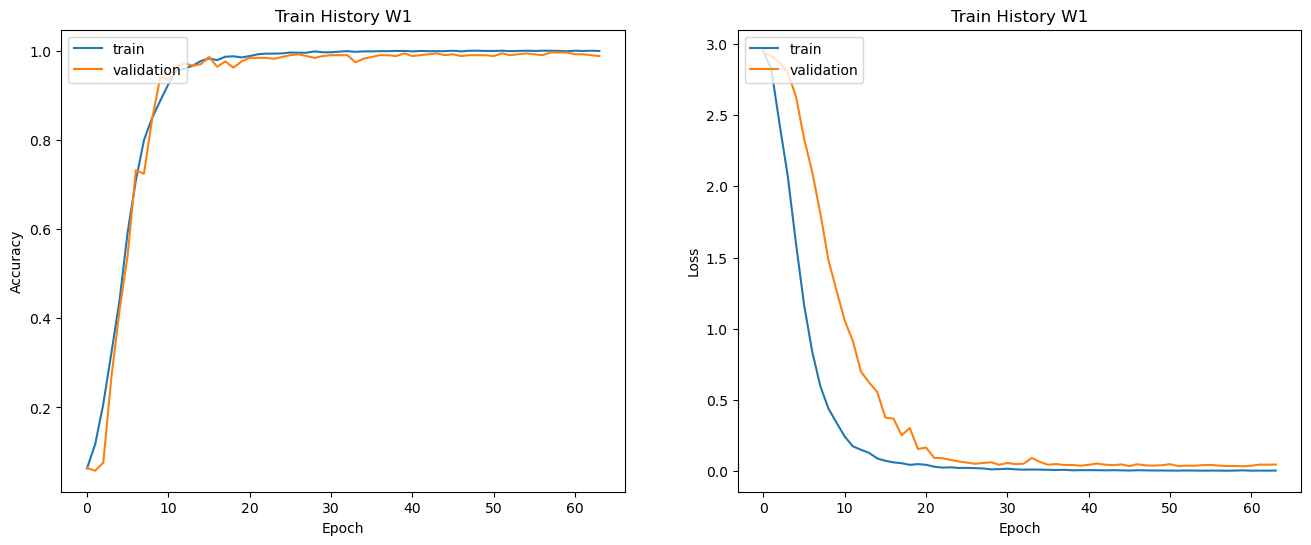

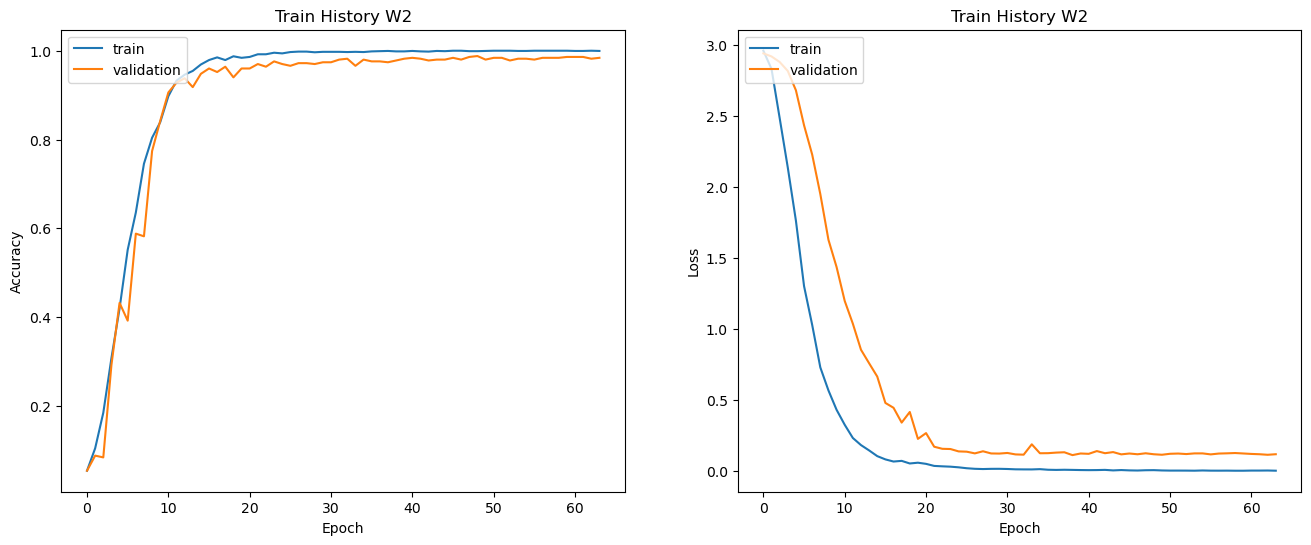

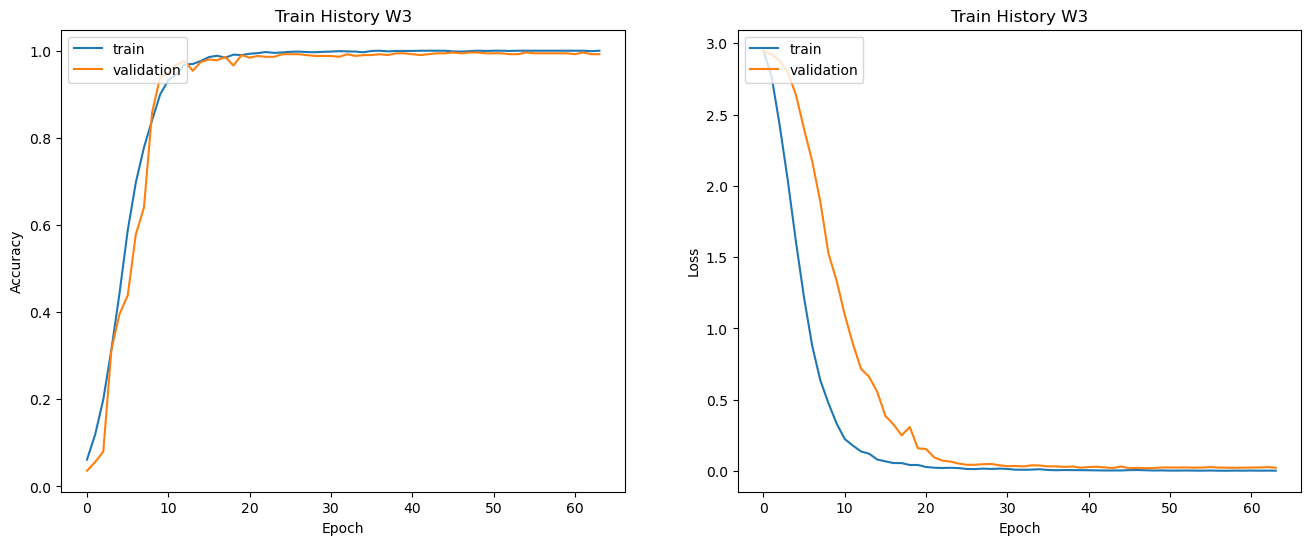

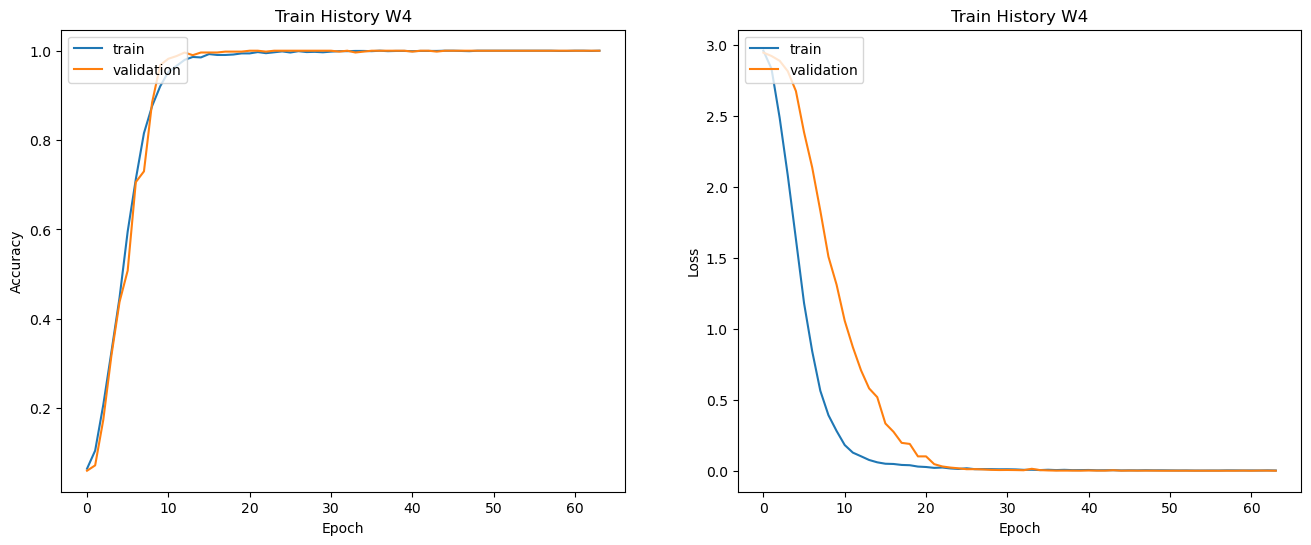

In [13]:
#plot

def show_train_history(cur_history):
    fig=plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)
    plt.plot(cur_history["fc13_W1_accuracy"])
    plt.plot(cur_history["val_fc13_W1_accuracy"])
    plt.title("Train History W1")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)
    plt.plot(cur_history["fc13_W1_loss"])
    plt.plot(cur_history["val_fc13_W1_loss"])
    plt.title("Train History W1")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.savefig('result/'+mode+"W1.png")
    plt.show()
    
    
    fig=plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)
    plt.plot(cur_history["fc13_W2_accuracy"])
    plt.plot(cur_history["val_fc13_W2_accuracy"])
    plt.title("Train History W2")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)
    plt.plot(cur_history["fc13_W2_loss"])
    plt.plot(cur_history["val_fc13_W2_loss"])
    plt.title("Train History W2")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.savefig('result/'+mode+"W2.png")
    plt.show()
    
    
    fig=plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)
    plt.plot(cur_history["fc13_W3_accuracy"])
    plt.plot(cur_history["val_fc13_W3_accuracy"])
    plt.title("Train History W3")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)
    plt.plot(cur_history["fc13_W3_loss"])
    plt.plot(cur_history["val_fc13_W3_loss"])
    plt.title("Train History W3")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.savefig('result/'+mode+"W3.png")
    plt.show()
    
    fig=plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)
    plt.plot(cur_history["fc13_W4_accuracy"])
    plt.plot(cur_history["val_fc13_W4_accuracy"])
    plt.title("Train History W4")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)
    plt.plot(cur_history["fc13_W4_loss"])
    plt.plot(cur_history["val_fc13_W4_loss"])
    plt.title("Train History W4")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.savefig('result/'+mode+"W4.png")
    plt.show()
    
    
    
show_train_history(cur_history) 

In [14]:
def one_hot_decode(data):
    data = np.squeeze(data)
    list_max=data.tolist()
    list_max.sort(key=lambda x: float(x), reverse = True)
    n = np.argwhere(data==list_max[0])
    return int(n), list_max[0]

def translate_Y(yi , show = False):
    
    num = {
        0 : "2", 1 : "3", 2 : "4", 3 : "5", 4 : "7", 
        5 : "9", 6 : "A", 7 : "C", 8 : "F", 9 : "H", 
        10: "K", 11: "M", 12: "N", 13: "P", 14: "Q",
        15: "R", 16: "T", 17: "Y", 18: "Z"  } 
    
    yi_new = num.get( yi ) 
            
    if show:
        print(yi)
        print(yi_new)            
        
    return yi_new

In [15]:
data = scipy.io.loadmat('database/test.mat') 
print("data.keys()",data.keys())
 
origin_X = np.array(data['x'].flat)
origin_Y = data['y'][0].reshape(3000,-1)
origin_Y_onehot= data['y_onehot'].reshape(3000,4,19)
    
print ("origin_X shape: "+str(origin_X.shape))
print ("origin_Y shape: "+str(origin_Y.shape))
print ("origin_Y_onehot shape: "+str(origin_Y_onehot.shape))

data.keys() dict_keys(['__header__', '__version__', '__globals__', 'y_onehot', 'x', 'y'])
origin_X shape: (3000,)
origin_Y shape: (3000, 4)
origin_Y_onehot shape: (3000, 4, 19)




-------------------------------------------
---------------- index 0 ----------------
1/1 [==============================] - 0s 406ms/step


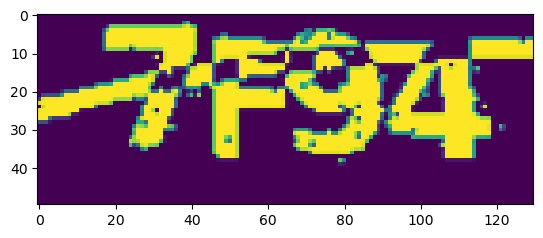

predict= [('7', 'F', '9', '4')]
answer= [('7', 'F', '9', '4')] ,wrong words= 0


-------------------------------------------
---------------- index 1 ----------------
1/1 [==============================] - 0s 69ms/step


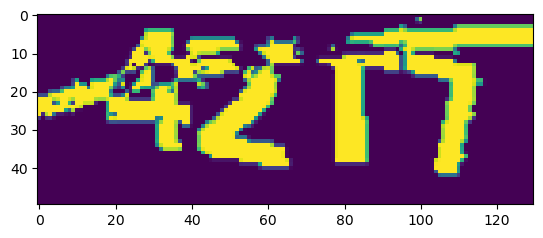

predict= [('4', '2', 'T', '7')]
answer= [('4', '2', 'T', '7')] ,wrong words= 0


-------------------------------------------
---------------- index 2 ----------------
1/1 [==============================] - 0s 71ms/step


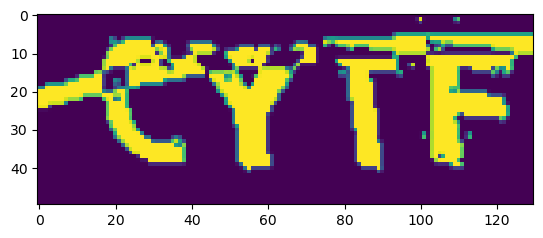

predict= [('C', 'Y', 'T', 'F')]
answer= [('C', 'Y', 'T', 'F')] ,wrong words= 0


-------------------------------------------
---------------- index 3 ----------------
1/1 [==============================] - 0s 66ms/step


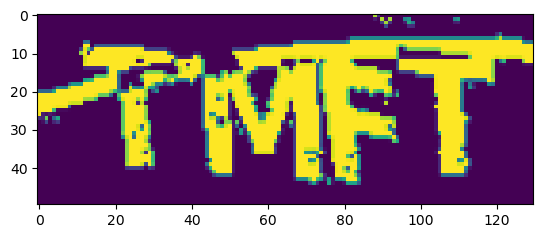

predict= [('T', 'M', 'F', 'T')]
answer= [('T', 'M', 'F', 'T')] ,wrong words= 0


-------------------------------------------
---------------- index 4 ----------------
1/1 [==============================] - 0s 57ms/step


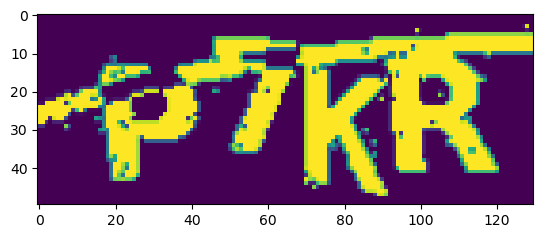

predict= [('P', '7', 'K', 'R')]
answer= [('P', '7', 'K', 'R')] ,wrong words= 0


-------------------------------------------
---------------- index 5 ----------------
1/1 [==============================] - 0s 64ms/step


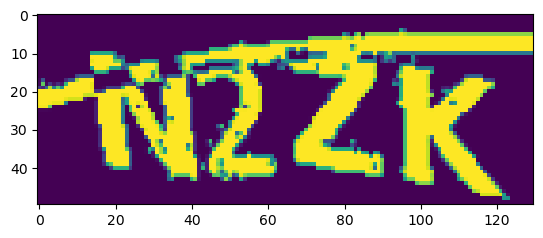

predict= [('N', '2', 'Z', 'K')]
answer= [('N', '2', 'Z', 'K')] ,wrong words= 0


-------------------------------------------
---------------- index 6 ----------------
1/1 [==============================] - 0s 55ms/step


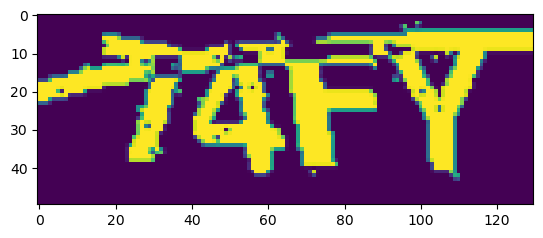

predict= [('7', '4', 'F', 'Y')]
answer= [('7', '4', 'F', 'Y')] ,wrong words= 0


-------------------------------------------
---------------- index 7 ----------------
1/1 [==============================] - 0s 57ms/step


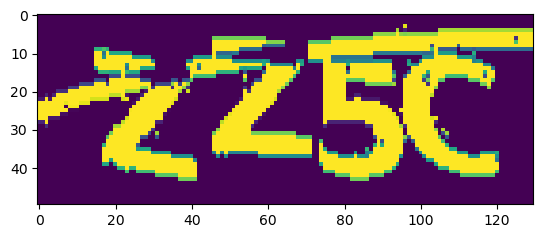

predict= [('Z', 'Z', '5', 'C')]
answer= [('Z', 'Z', '5', 'C')] ,wrong words= 0


-------------------------------------------
---------------- index 8 ----------------
1/1 [==============================] - 0s 63ms/step


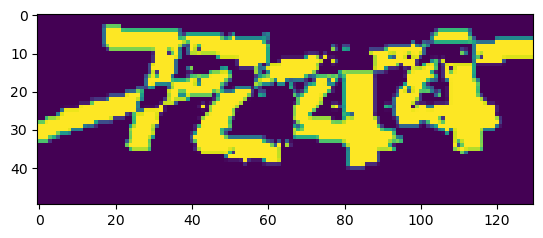

predict= [('7', 'Z', '4', '4')]
answer= [('7', 'Z', '4', '4')] ,wrong words= 0


-------------------------------------------
---------------- index 9 ----------------
1/1 [==============================] - 0s 51ms/step


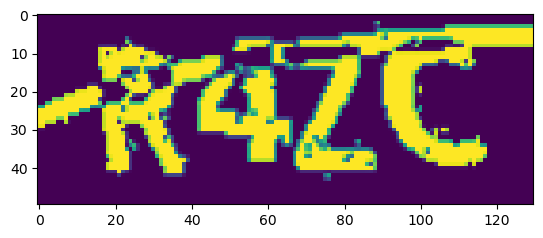

predict= [('R', '4', 'Z', 'C')]
answer= [('R', '4', 'Z', 'C')] ,wrong words= 0


-------------------------------------------
---------------- index 10 ----------------
1/1 [==============================] - 0s 63ms/step


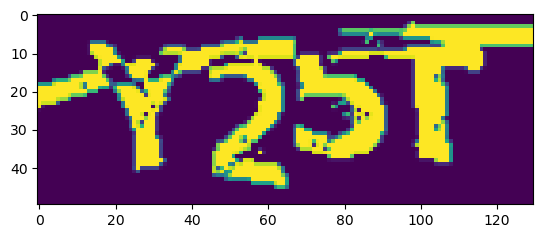

predict= [('Y', '2', '5', 'T')]
answer= [('Y', '2', '5', 'T')] ,wrong words= 0


-------------------------------------------
---------------- index 11 ----------------
1/1 [==============================] - 0s 62ms/step


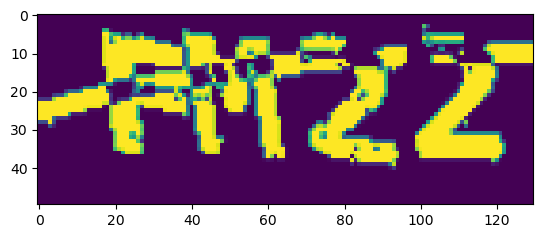

predict= [('F', 'M', '2', '2')]
answer= [('F', 'M', '2', '2')] ,wrong words= 0


-------------------------------------------
---------------- index 12 ----------------
1/1 [==============================] - 0s 59ms/step


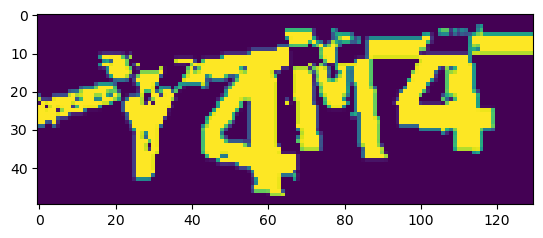

predict= [('Y', '4', 'M', '4')]
answer= [('Y', '4', 'M', '4')] ,wrong words= 0


-------------------------------------------
---------------- index 13 ----------------
1/1 [==============================] - 0s 63ms/step
predict= [('M', '2', '3', '2')]
answer= [('M', '2', 'Q', '2')] ,wrong words= 1


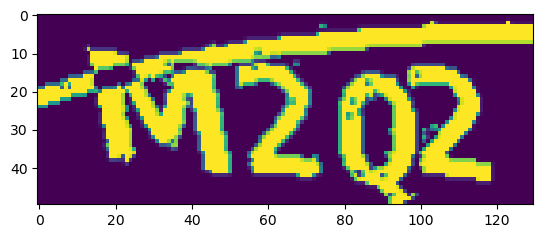

predict= [('M', '2', '3', '2')]
answer= [('M', '2', 'Q', '2')] ,wrong words= 1


-------------------------------------------
---------------- index 14 ----------------
1/1 [==============================] - 0s 52ms/step


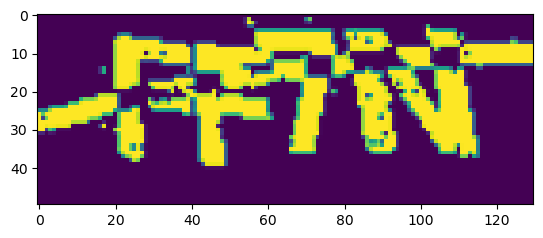

predict= [('F', 'F', '7', 'N')]
answer= [('F', 'F', '7', 'N')] ,wrong words= 0


-------------------------------------------
---------------- index 15 ----------------
1/1 [==============================] - 0s 50ms/step


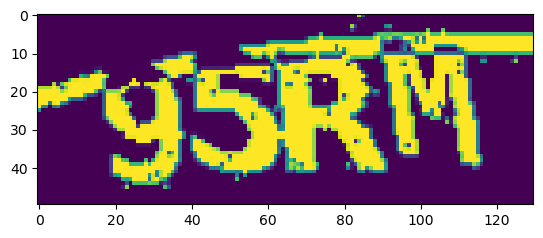

predict= [('9', '5', 'R', 'M')]
answer= [('9', '5', 'R', 'M')] ,wrong words= 0


-------------------------------------------
---------------- index 16 ----------------
1/1 [==============================] - 0s 66ms/step


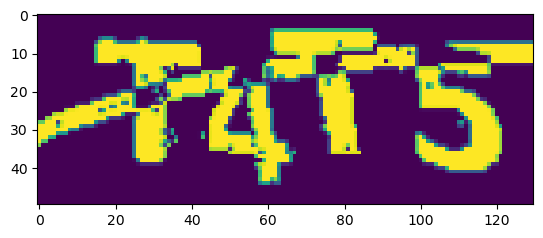

predict= [('T', '4', 'T', '5')]
answer= [('T', '4', 'T', '5')] ,wrong words= 0


-------------------------------------------
---------------- index 17 ----------------
1/1 [==============================] - 0s 71ms/step
predict= [('F', '3', '4', 'A')]
answer= [('F', '3', '4', '3')] ,wrong words= 1


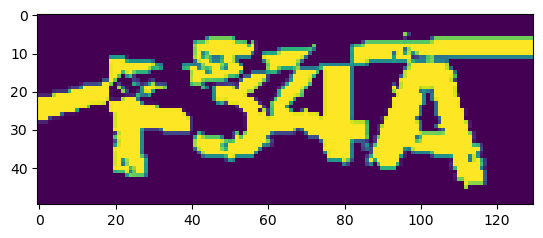

predict= [('F', '3', '4', 'A')]
answer= [('F', '3', '4', '3')] ,wrong words= 1


-------------------------------------------
---------------- index 18 ----------------
1/1 [==============================] - 0s 66ms/step


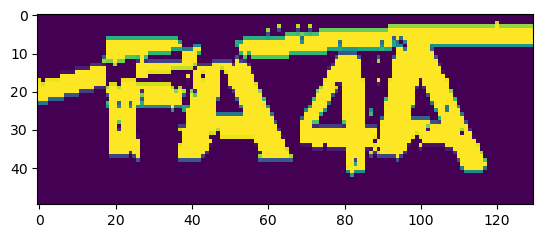

predict= [('F', 'A', '4', 'A')]
answer= [('F', 'A', '4', 'A')] ,wrong words= 0


-------------------------------------------
---------------- index 19 ----------------
1/1 [==============================] - 0s 48ms/step


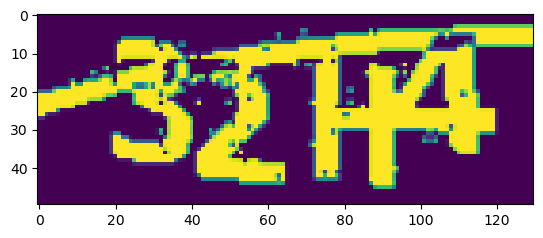

predict= [('3', '2', 'H', '4')]
answer= [('3', '2', 'H', '4')] ,wrong words= 0


-------------------------------------------
---------------- index 20 ----------------
1/1 [==============================] - 0s 77ms/step


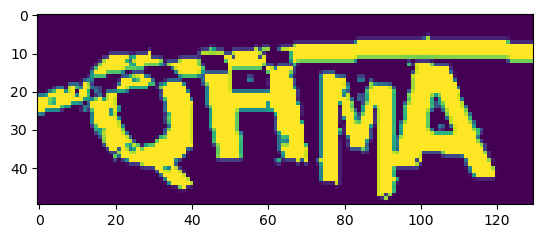

predict= [('Q', 'H', 'M', 'A')]
answer= [('Q', 'H', 'M', 'A')] ,wrong words= 0


-------------------------------------------
---------------- index 21 ----------------
1/1 [==============================] - 0s 82ms/step


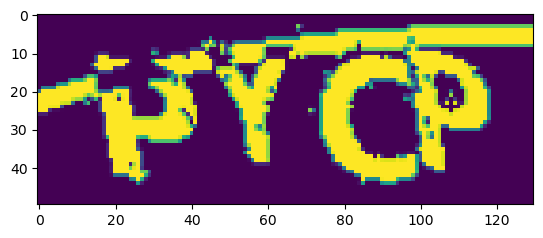

predict= [('P', 'Y', 'C', 'P')]
answer= [('P', 'Y', 'C', 'P')] ,wrong words= 0


-------------------------------------------
---------------- index 22 ----------------
1/1 [==============================] - 0s 60ms/step


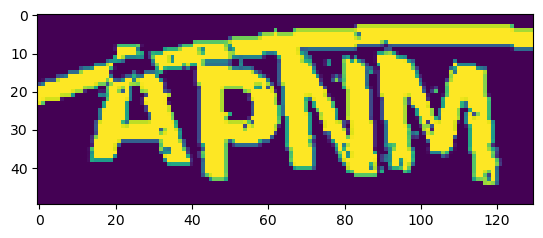

predict= [('A', 'P', 'N', 'M')]
answer= [('A', 'P', 'N', 'M')] ,wrong words= 0


-------------------------------------------
---------------- index 23 ----------------
1/1 [==============================] - 0s 59ms/step


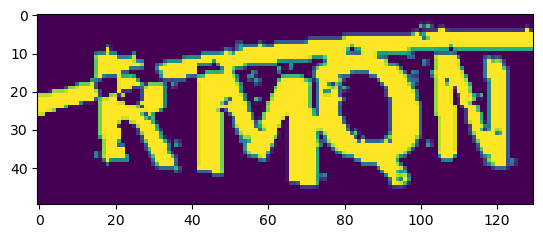

predict= [('R', 'M', 'Q', 'N')]
answer= [('R', 'M', 'Q', 'N')] ,wrong words= 0


-------------------------------------------
---------------- index 24 ----------------
1/1 [==============================] - 0s 51ms/step


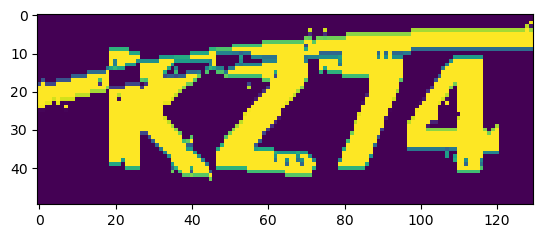

predict= [('K', 'Z', '7', '4')]
answer= [('K', 'Z', '7', '4')] ,wrong words= 0


-------------------------------------------
---------------- index 25 ----------------
1/1 [==============================] - 0s 82ms/step


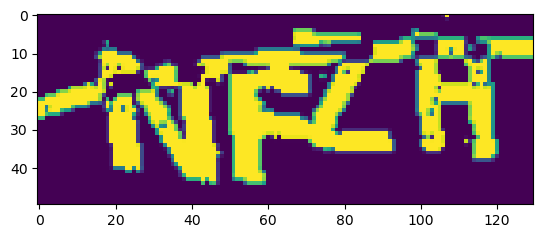

predict= [('N', 'F', 'Z', 'H')]
answer= [('N', 'F', 'Z', 'H')] ,wrong words= 0


-------------------------------------------
---------------- index 26 ----------------
1/1 [==============================] - 0s 62ms/step


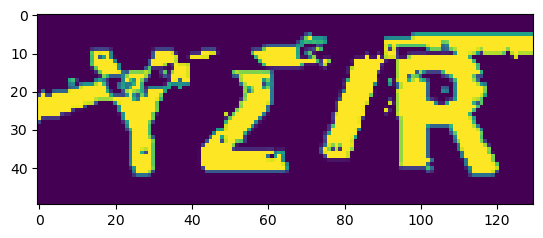

predict= [('Y', '2', '7', 'R')]
answer= [('Y', '2', '7', 'R')] ,wrong words= 0


-------------------------------------------
---------------- index 27 ----------------
1/1 [==============================] - 0s 69ms/step
predict= [('A', 'Y', 'R', 'K')]
answer= [('A', 'Y', 'R', '4')] ,wrong words= 1


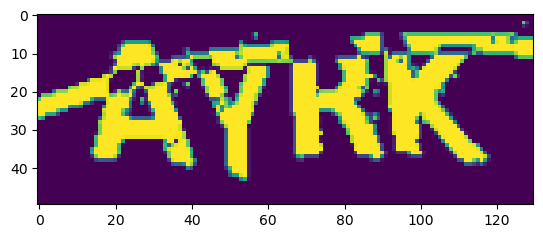

predict= [('A', 'Y', 'R', 'K')]
answer= [('A', 'Y', 'R', '4')] ,wrong words= 1


-------------------------------------------
---------------- index 28 ----------------
1/1 [==============================] - 0s 62ms/step


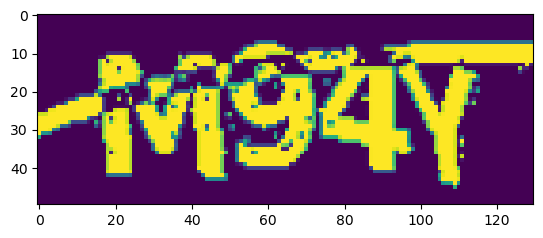

predict= [('M', '9', '4', 'Y')]
answer= [('M', '9', '4', 'Y')] ,wrong words= 0


-------------------------------------------
---------------- index 29 ----------------
1/1 [==============================] - 0s 66ms/step


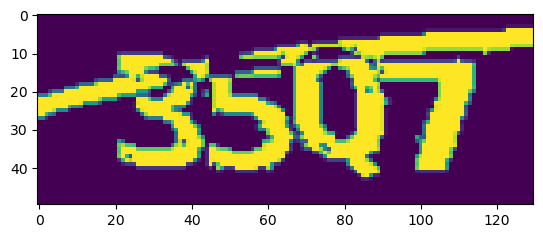

predict= [('3', '5', 'Q', '7')]
answer= [('3', '5', 'Q', '7')] ,wrong words= 0


-------------------------------------------
---------------- index 30 ----------------
1/1 [==============================] - 0s 55ms/step


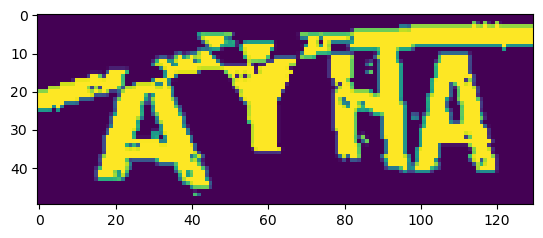

predict= [('A', 'Y', 'H', 'A')]
answer= [('A', 'Y', 'H', 'A')] ,wrong words= 0


-------------------------------------------
---------------- index 31 ----------------
1/1 [==============================] - 0s 50ms/step


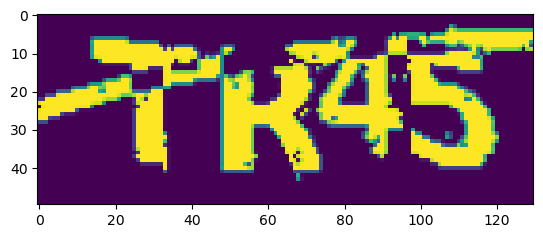

predict= [('T', 'R', '4', '5')]
answer= [('T', 'R', '4', '5')] ,wrong words= 0


-------------------------------------------
---------------- index 32 ----------------
1/1 [==============================] - 0s 47ms/step


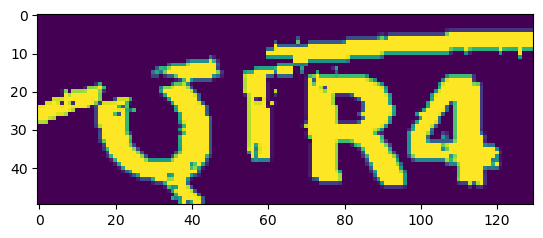

predict= [('Q', 'T', 'R', '4')]
answer= [('Q', 'T', 'R', '4')] ,wrong words= 0


-------------------------------------------
---------------- index 33 ----------------
1/1 [==============================] - 0s 80ms/step


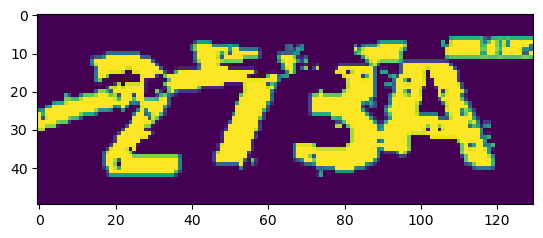

predict= [('2', '7', '3', 'A')]
answer= [('2', '7', '3', 'A')] ,wrong words= 0


-------------------------------------------
---------------- index 34 ----------------
1/1 [==============================] - 0s 34ms/step


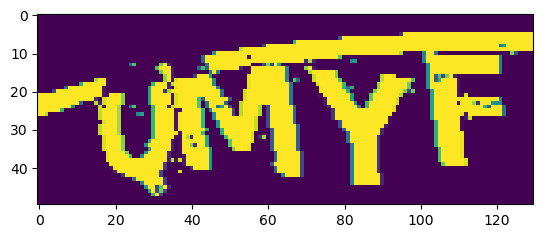

predict= [('Q', 'M', 'Y', 'F')]
answer= [('Q', 'M', 'Y', 'F')] ,wrong words= 0


-------------------------------------------
---------------- index 35 ----------------
1/1 [==============================] - 0s 54ms/step


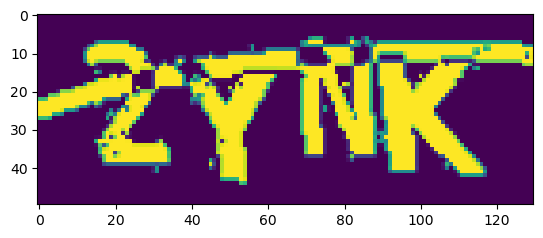

predict= [('2', 'Y', 'N', 'K')]
answer= [('2', 'Y', 'N', 'K')] ,wrong words= 0


-------------------------------------------
---------------- index 36 ----------------
1/1 [==============================] - 0s 46ms/step


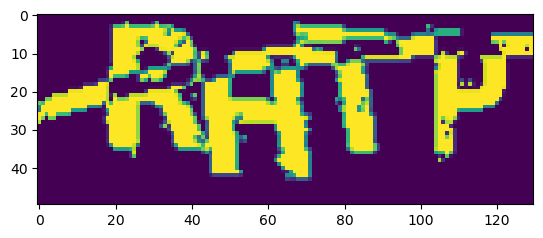

predict= [('R', 'H', 'T', 'P')]
answer= [('R', 'H', 'T', 'P')] ,wrong words= 0


-------------------------------------------
---------------- index 37 ----------------
1/1 [==============================] - 0s 60ms/step
predict= [('7', 'K', 'Q', 'M')]
answer= [('7', 'K', 'Q', '5')] ,wrong words= 1


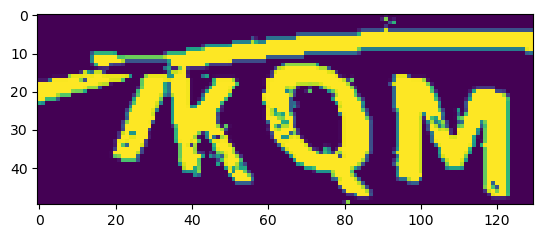

predict= [('7', 'K', 'Q', 'M')]
answer= [('7', 'K', 'Q', '5')] ,wrong words= 1


-------------------------------------------
---------------- index 38 ----------------
1/1 [==============================] - 0s 54ms/step


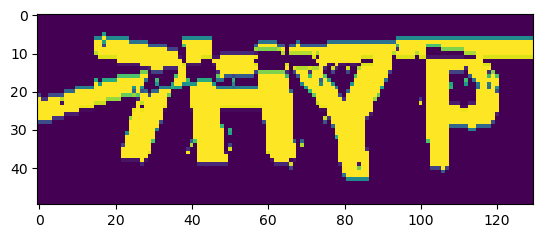

predict= [('7', 'H', 'Y', 'P')]
answer= [('7', 'H', 'Y', 'P')] ,wrong words= 0


-------------------------------------------
---------------- index 39 ----------------
1/1 [==============================] - 0s 50ms/step


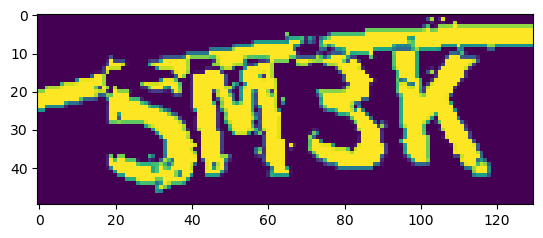

predict= [('5', 'M', '3', 'K')]
answer= [('5', 'M', '3', 'K')] ,wrong words= 0


-------------------------------------------
---------------- index 40 ----------------
1/1 [==============================] - 0s 52ms/step


-------------------------------------------
---------------- index 41 ----------------
1/1 [==============================] - 0s 73ms/step


-------------------------------------------
---------------- index 42 ----------------
1/1 [==============================] - 0s 57ms/step


-------------------------------------------
---------------- index 43 ----------------
1/1 [==============================] - 0s 57ms/step
predict= [('M', 'M', 'C', 'T')]
answer= [('M', 'M', 'C', 'Q')] ,wrong words= 1


-------------------------------------------
---------------- index 44 ----------------
1/1 [==============================] - 0s 59ms/step


-------------------------------------------
---------------- index 45 ----------------
1/1 [==============================] - 0s 56ms/s

1/1 [==============================] - 0s 53ms/step


-------------------------------------------
---------------- index 96 ----------------
1/1 [==============================] - 0s 58ms/step


-------------------------------------------
---------------- index 97 ----------------
1/1 [==============================] - 0s 52ms/step


-------------------------------------------
---------------- index 98 ----------------
1/1 [==============================] - 0s 67ms/step


-------------------------------------------
---------------- index 99 ----------------
1/1 [==============================] - 0s 59ms/step


-------------------------------------------
---------------- index 100 ----------------
1/1 [==============================] - 0s 62ms/step


-------------------------------------------
---------------- index 101 ----------------
1/1 [==============================] - 0s 64ms/step


-------------------------------------------
---------------- index 102 ----------------
1/1 [=====

1/1 [==============================] - 0s 62ms/step


-------------------------------------------
---------------- index 154 ----------------
1/1 [==============================] - 0s 46ms/step


-------------------------------------------
---------------- index 155 ----------------
1/1 [==============================] - 0s 60ms/step


-------------------------------------------
---------------- index 156 ----------------
1/1 [==============================] - 0s 56ms/step


-------------------------------------------
---------------- index 157 ----------------
1/1 [==============================] - 0s 58ms/step


-------------------------------------------
---------------- index 158 ----------------
1/1 [==============================] - 0s 44ms/step


-------------------------------------------
---------------- index 159 ----------------
1/1 [==============================] - 0s 59ms/step


-------------------------------------------
---------------- index 160 ----------------
1/1 [=

1/1 [==============================] - 0s 56ms/step


-------------------------------------------
---------------- index 210 ----------------
1/1 [==============================] - 0s 60ms/step


-------------------------------------------
---------------- index 211 ----------------
1/1 [==============================] - 0s 55ms/step


-------------------------------------------
---------------- index 212 ----------------
1/1 [==============================] - 0s 58ms/step


-------------------------------------------
---------------- index 213 ----------------
1/1 [==============================] - 0s 72ms/step


-------------------------------------------
---------------- index 214 ----------------
1/1 [==============================] - 0s 72ms/step


-------------------------------------------
---------------- index 215 ----------------
1/1 [==============================] - 0s 52ms/step


-------------------------------------------
---------------- index 216 ----------------
1/1 [=

1/1 [==============================] - 0s 59ms/step


-------------------------------------------
---------------- index 267 ----------------
1/1 [==============================] - 0s 54ms/step


-------------------------------------------
---------------- index 268 ----------------
1/1 [==============================] - 0s 50ms/step


-------------------------------------------
---------------- index 269 ----------------
1/1 [==============================] - 0s 57ms/step


-------------------------------------------
---------------- index 270 ----------------
1/1 [==============================] - 0s 61ms/step


-------------------------------------------
---------------- index 271 ----------------
1/1 [==============================] - 0s 58ms/step


-------------------------------------------
---------------- index 272 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 273 ----------------
1/1 [=

1/1 [==============================] - 0s 59ms/step


-------------------------------------------
---------------- index 325 ----------------
1/1 [==============================] - 0s 57ms/step


-------------------------------------------
---------------- index 326 ----------------
1/1 [==============================] - 0s 69ms/step


-------------------------------------------
---------------- index 327 ----------------
1/1 [==============================] - 0s 50ms/step


-------------------------------------------
---------------- index 328 ----------------
1/1 [==============================] - 0s 59ms/step


-------------------------------------------
---------------- index 329 ----------------
1/1 [==============================] - 0s 56ms/step


-------------------------------------------
---------------- index 330 ----------------
1/1 [==============================] - 0s 50ms/step


-------------------------------------------
---------------- index 331 ----------------
1/1 [=

1/1 [==============================] - 0s 57ms/step


-------------------------------------------
---------------- index 383 ----------------
1/1 [==============================] - 0s 56ms/step


-------------------------------------------
---------------- index 384 ----------------
1/1 [==============================] - 0s 74ms/step


-------------------------------------------
---------------- index 385 ----------------
1/1 [==============================] - 0s 36ms/step


-------------------------------------------
---------------- index 386 ----------------
1/1 [==============================] - 0s 53ms/step


-------------------------------------------
---------------- index 387 ----------------
1/1 [==============================] - 0s 55ms/step


-------------------------------------------
---------------- index 388 ----------------
1/1 [==============================] - 0s 60ms/step


-------------------------------------------
---------------- index 389 ----------------
1/1 [=

1/1 [==============================] - 0s 34ms/step


-------------------------------------------
---------------- index 440 ----------------
1/1 [==============================] - 0s 29ms/step


-------------------------------------------
---------------- index 441 ----------------
1/1 [==============================] - 0s 28ms/step


-------------------------------------------
---------------- index 442 ----------------
1/1 [==============================] - 0s 27ms/step


-------------------------------------------
---------------- index 443 ----------------
1/1 [==============================] - 0s 27ms/step


-------------------------------------------
---------------- index 444 ----------------
1/1 [==============================] - 0s 30ms/step


-------------------------------------------
---------------- index 445 ----------------
1/1 [==============================] - 0s 27ms/step


-------------------------------------------
---------------- index 446 ----------------
1/1 [=

1/1 [==============================] - 0s 79ms/step


-------------------------------------------
---------------- index 497 ----------------
1/1 [==============================] - 0s 64ms/step


-------------------------------------------
---------------- index 498 ----------------
1/1 [==============================] - 0s 48ms/step


-------------------------------------------
---------------- index 499 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 500 ----------------
1/1 [==============================] - 0s 65ms/step


-------------------------------------------
---------------- index 501 ----------------
1/1 [==============================] - 0s 74ms/step


-------------------------------------------
---------------- index 502 ----------------
1/1 [==============================] - 0s 63ms/step
predict= [('T', 'P', 'T', '3')]
answer= [('7', 'P', 'T', '3')] ,wrong words= 1


---------------

1/1 [==============================] - 0s 73ms/step


-------------------------------------------
---------------- index 554 ----------------
1/1 [==============================] - 0s 48ms/step


-------------------------------------------
---------------- index 555 ----------------
1/1 [==============================] - 0s 73ms/step


-------------------------------------------
---------------- index 556 ----------------
1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 557 ----------------
1/1 [==============================] - 0s 61ms/step


-------------------------------------------
---------------- index 558 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 559 ----------------
1/1 [==============================] - 0s 69ms/step


-------------------------------------------
---------------- index 560 ----------------
1/1 [=

1/1 [==============================] - 0s 73ms/step


-------------------------------------------
---------------- index 612 ----------------
1/1 [==============================] - 0s 48ms/step


-------------------------------------------
---------------- index 613 ----------------
1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 614 ----------------
1/1 [==============================] - 0s 46ms/step


-------------------------------------------
---------------- index 615 ----------------
1/1 [==============================] - 0s 38ms/step


-------------------------------------------
---------------- index 616 ----------------
1/1 [==============================] - 0s 59ms/step


-------------------------------------------
---------------- index 617 ----------------
1/1 [==============================] - 0s 53ms/step


-------------------------------------------
---------------- index 618 ----------------
1/1 [=

1/1 [==============================] - 0s 54ms/step


-------------------------------------------
---------------- index 669 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 670 ----------------
1/1 [==============================] - 0s 51ms/step


-------------------------------------------
---------------- index 671 ----------------
1/1 [==============================] - 0s 62ms/step


-------------------------------------------
---------------- index 672 ----------------
1/1 [==============================] - 0s 72ms/step


-------------------------------------------
---------------- index 673 ----------------
1/1 [==============================] - 0s 48ms/step


-------------------------------------------
---------------- index 674 ----------------
1/1 [==============================] - 0s 55ms/step


-------------------------------------------
---------------- index 675 ----------------
1/1 [=

1/1 [==============================] - 0s 64ms/step


-------------------------------------------
---------------- index 726 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 727 ----------------
1/1 [==============================] - 0s 49ms/step


-------------------------------------------
---------------- index 728 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 729 ----------------
1/1 [==============================] - 0s 59ms/step


-------------------------------------------
---------------- index 730 ----------------
1/1 [==============================] - 0s 46ms/step


-------------------------------------------
---------------- index 731 ----------------
1/1 [==============================] - 0s 64ms/step


-------------------------------------------
---------------- index 732 ----------------
1/1 [=

1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 783 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 784 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 785 ----------------
1/1 [==============================] - 0s 50ms/step


-------------------------------------------
---------------- index 786 ----------------
1/1 [==============================] - 0s 48ms/step


-------------------------------------------
---------------- index 787 ----------------
1/1 [==============================] - 0s 68ms/step


-------------------------------------------
---------------- index 788 ----------------
1/1 [==============================] - 0s 48ms/step


-------------------------------------------
---------------- index 789 ----------------
1/1 [=

1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 840 ----------------
1/1 [==============================] - 0s 57ms/step


-------------------------------------------
---------------- index 841 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 842 ----------------
1/1 [==============================] - 0s 60ms/step


-------------------------------------------
---------------- index 843 ----------------
1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 844 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 845 ----------------
1/1 [==============================] - 0s 65ms/step


-------------------------------------------
---------------- index 846 ----------------
1/1 [=

1/1 [==============================] - 0s 66ms/step


-------------------------------------------
---------------- index 897 ----------------
1/1 [==============================] - 0s 52ms/step


-------------------------------------------
---------------- index 898 ----------------
1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 899 ----------------
1/1 [==============================] - 0s 73ms/step


-------------------------------------------
---------------- index 900 ----------------
1/1 [==============================] - 0s 46ms/step


-------------------------------------------
---------------- index 901 ----------------
1/1 [==============================] - 0s 34ms/step


-------------------------------------------
---------------- index 902 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 903 ----------------
1/1 [=

1/1 [==============================] - 0s 56ms/step


-------------------------------------------
---------------- index 954 ----------------
1/1 [==============================] - 0s 76ms/step


-------------------------------------------
---------------- index 955 ----------------
1/1 [==============================] - 0s 66ms/step


-------------------------------------------
---------------- index 956 ----------------
1/1 [==============================] - 0s 71ms/step


-------------------------------------------
---------------- index 957 ----------------
1/1 [==============================] - 0s 65ms/step


-------------------------------------------
---------------- index 958 ----------------
1/1 [==============================] - 0s 71ms/step


-------------------------------------------
---------------- index 959 ----------------
1/1 [==============================] - 0s 66ms/step


-------------------------------------------
---------------- index 960 ----------------
1/1 [=

1/1 [==============================] - 0s 64ms/step


-------------------------------------------
---------------- index 1011 ----------------
1/1 [==============================] - 0s 66ms/step


-------------------------------------------
---------------- index 1012 ----------------
1/1 [==============================] - 0s 117ms/step


-------------------------------------------
---------------- index 1013 ----------------
1/1 [==============================] - 0s 76ms/step


-------------------------------------------
---------------- index 1014 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1015 ----------------
1/1 [==============================] - 0s 64ms/step
predict= [('K', 'R', 'F', '7')]
answer= [('K', 'R', 'F', 'Z')] ,wrong words= 1


-------------------------------------------
---------------- index 1016 ----------------
1/1 [==============================] - 0s 79ms/step


--------

1/1 [==============================] - 0s 79ms/step


-------------------------------------------
---------------- index 1068 ----------------
1/1 [==============================] - 0s 110ms/step


-------------------------------------------
---------------- index 1069 ----------------
1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 1070 ----------------
1/1 [==============================] - 0s 49ms/step


-------------------------------------------
---------------- index 1071 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1072 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1073 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1074 ---------------

1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1125 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1126 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1127 ----------------
1/1 [==============================] - 0s 50ms/step


-------------------------------------------
---------------- index 1128 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1129 ----------------
1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 1130 ----------------
1/1 [==============================] - 0s 48ms/step


-------------------------------------------
---------------- index 1131 ----------------

1/1 [==============================] - 0s 51ms/step


-------------------------------------------
---------------- index 1182 ----------------
1/1 [==============================] - 0s 56ms/step


-------------------------------------------
---------------- index 1183 ----------------
1/1 [==============================] - 0s 56ms/step


-------------------------------------------
---------------- index 1184 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1185 ----------------
1/1 [==============================] - 0s 49ms/step


-------------------------------------------
---------------- index 1186 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1187 ----------------
1/1 [==============================] - 0s 55ms/step


-------------------------------------------
---------------- index 1188 ----------------

1/1 [==============================] - 0s 62ms/step


-------------------------------------------
---------------- index 1239 ----------------
1/1 [==============================] - 0s 56ms/step


-------------------------------------------
---------------- index 1240 ----------------
1/1 [==============================] - 0s 52ms/step


-------------------------------------------
---------------- index 1241 ----------------
1/1 [==============================] - 0s 57ms/step


-------------------------------------------
---------------- index 1242 ----------------
1/1 [==============================] - 0s 56ms/step


-------------------------------------------
---------------- index 1243 ----------------
1/1 [==============================] - 0s 52ms/step
predict= [('T', 'A', 'R', '5')]
answer= [('7', 'A', 'R', '5')] ,wrong words= 1


-------------------------------------------
---------------- index 1244 ----------------
1/1 [==============================] - 0s 63ms/step


---------

1/1 [==============================] - 0s 64ms/step


-------------------------------------------
---------------- index 1295 ----------------
1/1 [==============================] - 0s 79ms/step


-------------------------------------------
---------------- index 1296 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1297 ----------------
1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 1298 ----------------
1/1 [==============================] - 0s 79ms/step


-------------------------------------------
---------------- index 1299 ----------------
1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 1300 ----------------
1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 1301 ----------------

1/1 [==============================] - 0s 54ms/step


-------------------------------------------
---------------- index 1348 ----------------
1/1 [==============================] - 0s 67ms/step
predict= [('7', '3', '2', 'F')]
answer= [('7', '4', '3', 'F')] ,wrong words= 2


-------------------------------------------
---------------- index 1349 ----------------
1/1 [==============================] - 0s 69ms/step


-------------------------------------------
---------------- index 1350 ----------------
1/1 [==============================] - 0s 50ms/step


-------------------------------------------
---------------- index 1351 ----------------
1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 1352 ----------------
1/1 [==============================] - 0s 75ms/step
predict= [('2', 'R', 'M', '9')]
answer= [('Z', 'R', 'M', '9')] ,wrong words= 1


-------------------------------------------
---------------- index 1353 -

1/1 [==============================] - 0s 54ms/step


-------------------------------------------
---------------- index 1403 ----------------
1/1 [==============================] - 0s 64ms/step


-------------------------------------------
---------------- index 1404 ----------------
1/1 [==============================] - 0s 67ms/step


-------------------------------------------
---------------- index 1405 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1406 ----------------
1/1 [==============================] - 0s 58ms/step


-------------------------------------------
---------------- index 1407 ----------------
1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 1408 ----------------
1/1 [==============================] - 0s 95ms/step


-------------------------------------------
---------------- index 1409 ----------------

1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1460 ----------------
1/1 [==============================] - 0s 74ms/step


-------------------------------------------
---------------- index 1461 ----------------
1/1 [==============================] - 0s 80ms/step


-------------------------------------------
---------------- index 1462 ----------------
1/1 [==============================] - 0s 56ms/step


-------------------------------------------
---------------- index 1463 ----------------
1/1 [==============================] - 0s 48ms/step


-------------------------------------------
---------------- index 1464 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1465 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1466 ----------------

1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1516 ----------------
1/1 [==============================] - 0s 46ms/step


-------------------------------------------
---------------- index 1517 ----------------
1/1 [==============================] - 0s 72ms/step


-------------------------------------------
---------------- index 1518 ----------------
1/1 [==============================] - 0s 48ms/step


-------------------------------------------
---------------- index 1519 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1520 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1521 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1522 ----------------

1/1 [==============================] - 0s 64ms/step


-------------------------------------------
---------------- index 1572 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1573 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1574 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1575 ----------------
1/1 [==============================] - 0s 62ms/step


-------------------------------------------
---------------- index 1576 ----------------
1/1 [==============================] - 0s 62ms/step


-------------------------------------------
---------------- index 1577 ----------------
1/1 [==============================] - 0s 56ms/step


-------------------------------------------
---------------- index 1578 ----------------

1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 1628 ----------------
1/1 [==============================] - 0s 48ms/step


-------------------------------------------
---------------- index 1629 ----------------
1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 1630 ----------------
1/1 [==============================] - 0s 59ms/step


-------------------------------------------
---------------- index 1631 ----------------
1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 1632 ----------------
1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 1633 ----------------
1/1 [==============================] - 0s 61ms/step


-------------------------------------------
---------------- index 1634 ----------------

1/1 [==============================] - 0s 79ms/step


-------------------------------------------
---------------- index 1685 ----------------
1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 1686 ----------------
1/1 [==============================] - 0s 65ms/step


-------------------------------------------
---------------- index 1687 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1688 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1689 ----------------
1/1 [==============================] - 0s 48ms/step


-------------------------------------------
---------------- index 1690 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1691 ----------------

1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 1742 ----------------
1/1 [==============================] - 0s 98ms/step


-------------------------------------------
---------------- index 1743 ----------------
1/1 [==============================] - 0s 79ms/step


-------------------------------------------
---------------- index 1744 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1745 ----------------
1/1 [==============================] - 0s 64ms/step


-------------------------------------------
---------------- index 1746 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1747 ----------------
1/1 [==============================] - 0s 69ms/step


-------------------------------------------
---------------- index 1748 ----------------

1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1798 ----------------
1/1 [==============================] - 0s 58ms/step


-------------------------------------------
---------------- index 1799 ----------------
1/1 [==============================] - 0s 62ms/step


-------------------------------------------
---------------- index 1800 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1801 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1802 ----------------
1/1 [==============================] - 0s 79ms/step
predict= [('H', 'A', 'Z', 'Y')]
answer= [('F', '7', 'Z', 'Y')] ,wrong words= 2


-------------------------------------------
---------------- index 1803 ----------------
1/1 [==============================] - 0s 64ms/step


---------

1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1854 ----------------
1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 1855 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1856 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1857 ----------------
1/1 [==============================] - 0s 54ms/step


-------------------------------------------
---------------- index 1858 ----------------
1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 1859 ----------------
1/1 [==============================] - 0s 48ms/step


-------------------------------------------
---------------- index 1860 ----------------

1/1 [==============================] - 0s 52ms/step


-------------------------------------------
---------------- index 1910 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1911 ----------------
1/1 [==============================] - 0s 94ms/step


-------------------------------------------
---------------- index 1912 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1913 ----------------
1/1 [==============================] - 0s 41ms/step


-------------------------------------------
---------------- index 1914 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 1915 ----------------
1/1 [==============================] - 0s 64ms/step
predict= [('C', 'C', '7', '7')]
answer= [('C', 'C', '7', 'T')] ,wrong words= 1


---------

1/1 [==============================] - 0s 57ms/step


-------------------------------------------
---------------- index 1965 ----------------
1/1 [==============================] - 0s 63ms/step
predict= [('M', 'F', 'Q', '5')]
answer= [('M', '4', 'Q', '5')] ,wrong words= 1


-------------------------------------------
---------------- index 1966 ----------------
1/1 [==============================] - 0s 56ms/step


-------------------------------------------
---------------- index 1967 ----------------
1/1 [==============================] - 0s 70ms/step


-------------------------------------------
---------------- index 1968 ----------------
1/1 [==============================] - 0s 69ms/step


-------------------------------------------
---------------- index 1969 ----------------
1/1 [==============================] - 0s 53ms/step


-------------------------------------------
---------------- index 1970 ----------------
1/1 [==============================] - 0s 69ms/step


---------

1/1 [==============================] - 0s 45ms/step


-------------------------------------------
---------------- index 2021 ----------------
1/1 [==============================] - 0s 53ms/step


-------------------------------------------
---------------- index 2022 ----------------
1/1 [==============================] - 0s 42ms/step


-------------------------------------------
---------------- index 2023 ----------------
1/1 [==============================] - 0s 46ms/step


-------------------------------------------
---------------- index 2024 ----------------
1/1 [==============================] - 0s 57ms/step


-------------------------------------------
---------------- index 2025 ----------------
1/1 [==============================] - 0s 54ms/step


-------------------------------------------
---------------- index 2026 ----------------
1/1 [==============================] - 0s 46ms/step


-------------------------------------------
---------------- index 2027 ----------------

1/1 [==============================] - 0s 58ms/step


-------------------------------------------
---------------- index 2078 ----------------
1/1 [==============================] - 0s 61ms/step


-------------------------------------------
---------------- index 2079 ----------------
1/1 [==============================] - 0s 51ms/step


-------------------------------------------
---------------- index 2080 ----------------
1/1 [==============================] - 0s 61ms/step


-------------------------------------------
---------------- index 2081 ----------------
1/1 [==============================] - 0s 59ms/step


-------------------------------------------
---------------- index 2082 ----------------
1/1 [==============================] - 0s 51ms/step


-------------------------------------------
---------------- index 2083 ----------------
1/1 [==============================] - 0s 54ms/step


-------------------------------------------
---------------- index 2084 ----------------

1/1 [==============================] - 0s 52ms/step


-------------------------------------------
---------------- index 2135 ----------------
1/1 [==============================] - 0s 65ms/step


-------------------------------------------
---------------- index 2136 ----------------
1/1 [==============================] - 0s 50ms/step


-------------------------------------------
---------------- index 2137 ----------------
1/1 [==============================] - 0s 53ms/step


-------------------------------------------
---------------- index 2138 ----------------
1/1 [==============================] - 0s 60ms/step


-------------------------------------------
---------------- index 2139 ----------------
1/1 [==============================] - 0s 55ms/step


-------------------------------------------
---------------- index 2140 ----------------
1/1 [==============================] - 0s 52ms/step


-------------------------------------------
---------------- index 2141 ----------------

1/1 [==============================] - 0s 68ms/step


-------------------------------------------
---------------- index 2191 ----------------
1/1 [==============================] - 0s 57ms/step


-------------------------------------------
---------------- index 2192 ----------------
1/1 [==============================] - 0s 49ms/step


-------------------------------------------
---------------- index 2193 ----------------
1/1 [==============================] - 0s 51ms/step


-------------------------------------------
---------------- index 2194 ----------------
1/1 [==============================] - 0s 53ms/step


-------------------------------------------
---------------- index 2195 ----------------
1/1 [==============================] - 0s 105ms/step


-------------------------------------------
---------------- index 2196 ----------------
1/1 [==============================] - 0s 51ms/step
predict= [('Z', '3', 'C', '9')]
answer= [('Z', 'C', 'C', '9')] ,wrong words= 1


--------

1/1 [==============================] - 0s 55ms/step


-------------------------------------------
---------------- index 2246 ----------------
1/1 [==============================] - 0s 54ms/step


-------------------------------------------
---------------- index 2247 ----------------
1/1 [==============================] - 0s 58ms/step
predict= [('H', 'T', '2', 'H')]
answer= [('H', 'T', '3', 'H')] ,wrong words= 1


-------------------------------------------
---------------- index 2248 ----------------
1/1 [==============================] - 0s 52ms/step


-------------------------------------------
---------------- index 2249 ----------------
1/1 [==============================] - 0s 57ms/step


-------------------------------------------
---------------- index 2250 ----------------
1/1 [==============================] - 0s 52ms/step


-------------------------------------------
---------------- index 2251 ----------------
1/1 [==============================] - 0s 52ms/step


---------

1/1 [==============================] - 0s 54ms/step
predict= [('H', 'M', '3', 'M')]
answer= [('H', 'M', '3', '4')] ,wrong words= 1


-------------------------------------------
---------------- index 2303 ----------------
1/1 [==============================] - 0s 50ms/step


-------------------------------------------
---------------- index 2304 ----------------
1/1 [==============================] - 0s 74ms/step


-------------------------------------------
---------------- index 2305 ----------------
1/1 [==============================] - 0s 54ms/step


-------------------------------------------
---------------- index 2306 ----------------
1/1 [==============================] - 0s 60ms/step


-------------------------------------------
---------------- index 2307 ----------------
1/1 [==============================] - 0s 51ms/step


-------------------------------------------
---------------- index 2308 ----------------
1/1 [==============================] - 0s 49ms/step


---------

1/1 [==============================] - 0s 78ms/step


-------------------------------------------
---------------- index 2358 ----------------
1/1 [==============================] - 0s 59ms/step


-------------------------------------------
---------------- index 2359 ----------------
1/1 [==============================] - 0s 51ms/step


-------------------------------------------
---------------- index 2360 ----------------
1/1 [==============================] - 0s 56ms/step


-------------------------------------------
---------------- index 2361 ----------------
1/1 [==============================] - 0s 53ms/step


-------------------------------------------
---------------- index 2362 ----------------
1/1 [==============================] - 0s 56ms/step


-------------------------------------------
---------------- index 2363 ----------------
1/1 [==============================] - 0s 87ms/step


-------------------------------------------
---------------- index 2364 ----------------

1/1 [==============================] - 0s 53ms/step


-------------------------------------------
---------------- index 2414 ----------------
1/1 [==============================] - 0s 52ms/step


-------------------------------------------
---------------- index 2415 ----------------
1/1 [==============================] - 0s 56ms/step
predict= [('2', 'R', 'F', 'Q')]
answer= [('2', 'R', 'H', 'Q')] ,wrong words= 1


-------------------------------------------
---------------- index 2416 ----------------
1/1 [==============================] - 0s 53ms/step


-------------------------------------------
---------------- index 2417 ----------------
1/1 [==============================] - 0s 52ms/step


-------------------------------------------
---------------- index 2418 ----------------
1/1 [==============================] - 0s 56ms/step


-------------------------------------------
---------------- index 2419 ----------------
1/1 [==============================] - 0s 46ms/step


---------

1/1 [==============================] - 0s 38ms/step


-------------------------------------------
---------------- index 2470 ----------------
1/1 [==============================] - 0s 58ms/step


-------------------------------------------
---------------- index 2471 ----------------
1/1 [==============================] - 0s 53ms/step


-------------------------------------------
---------------- index 2472 ----------------
1/1 [==============================] - 0s 53ms/step


-------------------------------------------
---------------- index 2473 ----------------
1/1 [==============================] - 0s 49ms/step


-------------------------------------------
---------------- index 2474 ----------------
1/1 [==============================] - 0s 52ms/step


-------------------------------------------
---------------- index 2475 ----------------
1/1 [==============================] - 0s 51ms/step


-------------------------------------------
---------------- index 2476 ----------------

1/1 [==============================] - 0s 74ms/step


-------------------------------------------
---------------- index 2527 ----------------
1/1 [==============================] - 0s 53ms/step


-------------------------------------------
---------------- index 2528 ----------------
1/1 [==============================] - 0s 56ms/step


-------------------------------------------
---------------- index 2529 ----------------
1/1 [==============================] - 0s 52ms/step


-------------------------------------------
---------------- index 2530 ----------------
1/1 [==============================] - 0s 52ms/step


-------------------------------------------
---------------- index 2531 ----------------
1/1 [==============================] - 0s 53ms/step
predict= [('2', 'K', 'Y', 'R')]
answer= [('2', 'R', 'Y', 'R')] ,wrong words= 1


-------------------------------------------
---------------- index 2532 ----------------
1/1 [==============================] - 0s 55ms/step


---------

1/1 [==============================] - 0s 48ms/step
predict= [('Q', 'Z', 'F', '7')]
answer= [('Q', 'Z', 'F', 'C')] ,wrong words= 1


-------------------------------------------
---------------- index 2582 ----------------
1/1 [==============================] - 0s 60ms/step


-------------------------------------------
---------------- index 2583 ----------------
1/1 [==============================] - 0s 72ms/step


-------------------------------------------
---------------- index 2584 ----------------
1/1 [==============================] - 0s 57ms/step


-------------------------------------------
---------------- index 2585 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 2586 ----------------
1/1 [==============================] - 0s 58ms/step


-------------------------------------------
---------------- index 2587 ----------------
1/1 [==============================] - 0s 60ms/step


---------

1/1 [==============================] - 0s 56ms/step


-------------------------------------------
---------------- index 2637 ----------------
1/1 [==============================] - 0s 64ms/step


-------------------------------------------
---------------- index 2638 ----------------
1/1 [==============================] - 0s 62ms/step


-------------------------------------------
---------------- index 2639 ----------------
1/1 [==============================] - 0s 61ms/step


-------------------------------------------
---------------- index 2640 ----------------
1/1 [==============================] - 0s 60ms/step


-------------------------------------------
---------------- index 2641 ----------------
1/1 [==============================] - 0s 58ms/step


-------------------------------------------
---------------- index 2642 ----------------
1/1 [==============================] - 0s 59ms/step


-------------------------------------------
---------------- index 2643 ----------------

1/1 [==============================] - 0s 60ms/step


-------------------------------------------
---------------- index 2693 ----------------
1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 2694 ----------------
1/1 [==============================] - 0s 51ms/step


-------------------------------------------
---------------- index 2695 ----------------
1/1 [==============================] - 0s 51ms/step


-------------------------------------------
---------------- index 2696 ----------------
1/1 [==============================] - 0s 52ms/step


-------------------------------------------
---------------- index 2697 ----------------
1/1 [==============================] - 0s 54ms/step


-------------------------------------------
---------------- index 2698 ----------------
1/1 [==============================] - 0s 62ms/step


-------------------------------------------
---------------- index 2699 ----------------

1/1 [==============================] - 0s 53ms/step


-------------------------------------------
---------------- index 2750 ----------------
1/1 [==============================] - 0s 56ms/step


-------------------------------------------
---------------- index 2751 ----------------
1/1 [==============================] - 0s 53ms/step


-------------------------------------------
---------------- index 2752 ----------------
1/1 [==============================] - 0s 53ms/step


-------------------------------------------
---------------- index 2753 ----------------
1/1 [==============================] - 0s 51ms/step


-------------------------------------------
---------------- index 2754 ----------------
1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 2755 ----------------
1/1 [==============================] - 0s 55ms/step


-------------------------------------------
---------------- index 2756 ----------------

1/1 [==============================] - 0s 54ms/step


-------------------------------------------
---------------- index 2806 ----------------
1/1 [==============================] - 0s 52ms/step


-------------------------------------------
---------------- index 2807 ----------------
1/1 [==============================] - 0s 52ms/step


-------------------------------------------
---------------- index 2808 ----------------
1/1 [==============================] - 0s 51ms/step


-------------------------------------------
---------------- index 2809 ----------------
1/1 [==============================] - 0s 55ms/step


-------------------------------------------
---------------- index 2810 ----------------
1/1 [==============================] - 0s 41ms/step


-------------------------------------------
---------------- index 2811 ----------------
1/1 [==============================] - 0s 50ms/step


-------------------------------------------
---------------- index 2812 ----------------

1/1 [==============================] - 0s 73ms/step


-------------------------------------------
---------------- index 2862 ----------------
1/1 [==============================] - 0s 69ms/step


-------------------------------------------
---------------- index 2863 ----------------
1/1 [==============================] - 0s 57ms/step


-------------------------------------------
---------------- index 2864 ----------------
1/1 [==============================] - 0s 55ms/step


-------------------------------------------
---------------- index 2865 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 2866 ----------------
1/1 [==============================] - 0s 60ms/step


-------------------------------------------
---------------- index 2867 ----------------
1/1 [==============================] - 0s 65ms/step


-------------------------------------------
---------------- index 2868 ----------------

1/1 [==============================] - 0s 60ms/step


-------------------------------------------
---------------- index 2919 ----------------
1/1 [==============================] - 0s 50ms/step


-------------------------------------------
---------------- index 2920 ----------------
1/1 [==============================] - 0s 66ms/step


-------------------------------------------
---------------- index 2921 ----------------
1/1 [==============================] - 0s 38ms/step


-------------------------------------------
---------------- index 2922 ----------------
1/1 [==============================] - 0s 55ms/step


-------------------------------------------
---------------- index 2923 ----------------
1/1 [==============================] - 0s 47ms/step


-------------------------------------------
---------------- index 2924 ----------------
1/1 [==============================] - 0s 48ms/step


-------------------------------------------
---------------- index 2925 ----------------

1/1 [==============================] - 0s 50ms/step


-------------------------------------------
---------------- index 2976 ----------------
1/1 [==============================] - 0s 42ms/step


-------------------------------------------
---------------- index 2977 ----------------
1/1 [==============================] - 0s 52ms/step


-------------------------------------------
---------------- index 2978 ----------------
1/1 [==============================] - 0s 53ms/step


-------------------------------------------
---------------- index 2979 ----------------
1/1 [==============================] - 0s 63ms/step


-------------------------------------------
---------------- index 2980 ----------------
1/1 [==============================] - 0s 58ms/step


-------------------------------------------
---------------- index 2981 ----------------
1/1 [==============================] - 0s 62ms/step


-------------------------------------------
---------------- index 2982 ----------------

In [16]:
#predict
index=0
error=0
error_n=0
accumulate_time=0

start_total=time.time()

for i in origin_X:
    # 初始化
    print ('\n\n-------------------------------------------')
    print ('---------------- index',index,'----------------')
    predict_out=[]
    answer_out=[]
    temp=0
    start = time.time()
    # 依據使用的模型決定是否要預處理 
    # EX: model_name ='dn1_test_2021_10_19 01_47_20.h5'
    #     model_name.split('_')[0] == 'dn1'
    
    
    
    # 以下框起來部分要根據你選擇的資料處理方式做改變
    ############################################################################################
    """
    # if model == 'nopre': 
    img = Image.fromarray(i) # array要轉為image才能resize
    img=img.resize((130,50))
    
    # elif model == 'dn1':
    i=predo.img_denoise(i)
    img = Image.fromarray(i) # array要轉為image才能resize
    img=img.resize((130,50))
    """
    # elif model == 'dn2':
    i=predo.img_denoise2(i)
    img = Image.fromarray(i) # array要轉為image才能resize
    img=img.resize((130,50))
    #############################################################################################
       
        
        
    h=np.array(img)
    #print (h.shape)
    h=h.reshape(1,50,130,-1) # 轉為 (1,50,130,3) or (1,50,130,1)
    
    prediction=test.predict(h.astype('float32')/255) # predict
    
    # 轉譯偵測結果
    N1=translate_Y(one_hot_decode(prediction[0])[0]) # one_hot_decode 將19可能依信心排序
    N2=translate_Y(one_hot_decode(prediction[1])[0]) # translate_Y 由數字 1~19轉為符號
    N3=translate_Y(one_hot_decode(prediction[2])[0])
    N4=translate_Y(one_hot_decode(prediction[3])[0])   
    
    
    
    predict_out.append((N1,N2,N3,N4)) #四字元合併
    
    end = time.time()
    accumulate_time += (end - start)
    
    # 轉譯 Ground Truth    
    a1=translate_Y(origin_Y[index][0])
    a2=translate_Y(origin_Y[index][1])
    a3=translate_Y(origin_Y[index][2])
    a4=translate_Y(origin_Y[index][3])
    
    answer_out.append((a1,a2,a3,a4))
    
    
    if N1!=a1:
        error_n+=1 #此模型錯幾個字元
        temp+=1    #此圖錯幾個字元
    if N2!=a2:
        error_n+=1
        temp+=1
    if N3!=a3:
        error_n+=1
        temp+=1
    if N4!=a4:
        error_n+=1
        temp+=1
    
    if (N1!=a1 or N2!=a2 or N3!=a3 or N4!=a4):
        '''
        img = Image.fromarray(i, 'RGB')
        plt.imshow(img)
        plt.show()
        '''
        error+=1  
        print("predict=",predict_out)
        print("answer=",answer_out,",wrong words=",temp)
        
    if index<40:
        plt.imshow(img)
        plt.show()
        print("predict=",predict_out)
        print("answer=",answer_out,",wrong words=",temp)
        
    index+=1

In [17]:
#result   
num_picture=index
acc= (num_picture-error)/num_picture
acc_n=(num_picture*4-error_n)/(num_picture*4)

print (num_picture,"picture total wrong =",error)
print ("image accuracy = ",acc)
print ("word accuracy = ",acc_n)

print ('average per execute time: %f ms' %(accumulate_time/len(origin_X)*1000))

acc_total=0
end_total=time.time()
acc_total+=end_total-start_total
print ("total execute time = %f s " %(acc_total))

3000 picture total wrong = 104
image accuracy =  0.9653333333333334
word accuracy =  0.98975
average per execute time: 323.102378 ms
total execute time = 1046.821111 s 
